In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
#import sc_toolbox

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [4]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [5]:
import anndata

In [20]:
adata = sc.read('prostate_tumor.h5ad')

In [22]:
adata.obs['label'] = adata.obs['level2_cell_type']

In [23]:
adata.obs['replicate'] = adata.obs['dataset']
#adata.obs['replicate'] = [f'{x}_{y}' for x,y in zip(adata.obs['dataset'],adata.obs['source'])]

In [24]:
np.max(adata.X)

26139.0

In [25]:
#adata.layers["counts"] = adata.X.copy()

In [26]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")


In [27]:
adata

AnnData object with n_obs × n_vars = 63530 × 18717
    obs: 'sample', 'patient', 'batch', 'tissue', 'dataset', 'tuong_cell_type', 'tuong_immune_cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'level2_cell_type', 'leiden', '_scvi_raw_norm_scaling', 'level1_cell_type', 'label', 'replicate'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dataset_colors', 'leiden', 'leiden_colors', 'level1_cell_type_colors', 'level2_cell_type_colors', 'neighbors', 'tuong_cell_type_colors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [28]:
adata.obs["sample"] = [
    f"{rep}_{l}" for rep, l in zip(adata.obs["replicate"], adata.obs["label"])
]

In [29]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")
adata.obs["label"] = adata.obs["label"].astype("category")
adata.obs["sample"] = adata.obs["sample"].astype("category")
#adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

In [30]:
adata.obsm['X_pca'] = adata.obsm['X_scVI'].copy()

In [31]:
anndata2ri.activate()

In [32]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [33]:
#%%R
#devtools::install_github("MarioniLab/miloR")

In [34]:
%%R
library(CellChat)
#library(Seurat)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [35]:
del adata.obsp
del adata.uns
adata.obsm.pop('X_scANVI')
adata.obsm.pop('X_scVI')

array([[ 0.30305886,  1.5856583 , -0.4190415 , ...,  0.24268115,
        -0.6088761 , -0.5189104 ],
       [-0.31255084,  0.5853626 ,  2.177653  , ...,  1.2966571 ,
        -0.8735765 , -1.9645785 ],
       [-1.1639576 , -0.49057162,  0.9329462 , ..., -0.81070983,
         0.96835476, -0.27023837],
       ...,
       [ 0.45448583, -0.9924327 ,  1.5007098 , ..., -1.4850765 ,
        -0.6120876 , -0.46646616],
       [-0.16584653, -0.44947088, -0.095788  , ...,  0.28369355,
        -0.10142958,  0.989769  ],
       [ 0.43956548,  0.71903914,  0.3329022 , ...,  0.5393918 ,
         0.5135362 , -0.33097014]], dtype=float32)

In [36]:
adata_nk = sc.read('all_nk_cells.h5ad')

In [38]:
adata.obs['label'] = ['NK cells' if x in ['CD56bright NK cells', 'CD56dim NK cells'] else x for x in adata.obs['label']]

In [40]:
adata_nk.obs.index = [f'{x}_{y}' for x,y in zip(adata_nk.obs.index, adata_nk.obs['sample'])]

In [41]:
np.unique(adata_nk.obs['tumor_type'])

array(['breast', 'glioblastoma', 'lung', 'melanoma', 'none', 'pancreas',
       'prostate', 'sarcoma'], dtype=object)

In [42]:
adata.obs['label'] = [x if x != 'NK cells' else x if not y in adata_nk[adata_nk.obs['tumor_type'] == 'prostate'].obs.index else adata_nk[adata_nk.obs['tumor_type'] == 'prostate'][y].obs['nhood_group'][0] for x,y in zip(adata.obs['label'], adata.obs.index)]

In [53]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [54]:
sc.pp.log1p(adata)

In [55]:
#adata.layers['logcounts'] = adata.X

In [56]:
#adata

In [57]:
%%R -i adata
adata

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/anndata2ri/py2r.py:37: NotConvertedWarning: Conversion 'py2rpy' not defined for objects of type '<class 'NoneType'>'
  warn(str(e), NotConvertedWarning)


class: SingleCellExperiment 
dim: 18717 63497 
metadata(3): label_colors level2_cell_type_colors log1p
assays(1): X
rownames(18717): FAM87B LINC00115 ... AC004556.1 AC240274.1
rowData names(6): mt ribo ... pct_dropout_by_counts total_counts
colnames(63497):
  AAACCCAAGAAGAGCA-1-GSM5793828_P1t_heidegger_GSM5793828_P1t
  AAACCCAGTTCCGCTT-1-GSM5793828_P1t_heidegger_GSM5793828_P1t ...
  TTTGTCACAAGCCATT-13_chen_GSE141445_S13
  TTTGTCAGTGTCCTCT-13_chen_GSE141445_S13
colData names(22): sample patient ... label replicate
reducedDimNames(2): UMAP PCA
mainExpName: NULL
altExpNames(0):


In [58]:
%%R
assayNames(adata) <- c('logcounts')

In [59]:
%%R
assayNames(adata)

[1] "logcounts"


In [60]:
%%R
cellchat <- createCellChat(adata, group.by='label')

[1] "Create a CellChat object from a SingleCellExperiment object"
The `logcounts` assay is used 
The `colData` assay in the SingleCellExperiment object is used as cell meta information 
Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  1 2 3 4 5 6 Club epithelial Dendritic cells Endothelial cells ILCs Luminal epithelial Macrophages Mast cells Memory B cells Monocytes Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells Type 1 helper T cells Type 17 helper T cells 


In [44]:
%%R
saveRDS(cellchat, file = "/tumor-data/cellchat_prostate.rds")

In [15]:
%%R
cellchat <- readRDS(file = "/tumor-data/cellchat_prostate.rds")

In [61]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 18717 genes.
 63497 cells. 
CellChat analysis of single cell RNA-seq data! 


In [62]:
%%R
CellChatDB <- CellChatDB.human

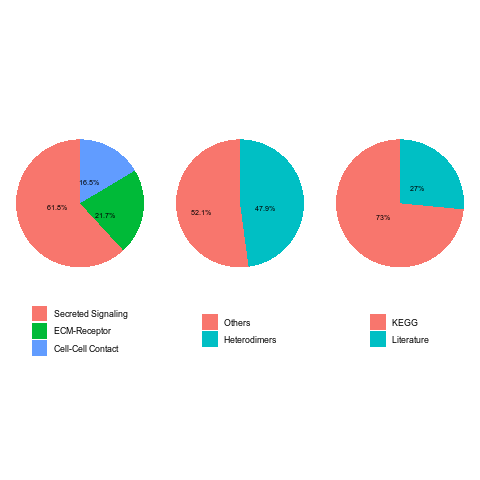

In [63]:
%%R
showDatabaseCategory(CellChatDB)

In [64]:
%%R
CellChatDB.use <- CellChatDB

In [65]:
%%R
cellchat@DB <- CellChatDB.use

In [66]:
%%R
cellchat <- subsetData(cellchat)
cellchat <- identifyOverExpressedGenes(cellchat)
cellchat <- identifyOverExpressedInteractions(cellchat)
#cellchat <- projectData(cellchat, PPI.human)

  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~16s           |++                                                | 2 % ~17s           |++                                                | 4 % ~17s           |+++                                               | 5 % ~17s           |++++                                              | 6 % ~17s           |++++                                              | 7 % ~17s           |+++++                                             | 9 % ~16s           |+++++                                             | 10% ~16s           |++++++                                            | 11% ~16s           |+++++++                                           | 12% ~16s           |+++++++                                           | 13% ~16s           |++++++++                                          | 15% ~15s           |++++++++                                          | 16% ~15s 

In [67]:
#%%R
#saveRDS(cellchat, file = "/tumor-data/cellchat.rds")

In [68]:
%%R
cellchat <- computeCommunProb(cellchat)

triMean is used for calculating the average gene expression per cell group. 
[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2023-10-03 12:01:46]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2023-10-03 12:19:00]"


In [69]:
%%R
cellchat <- filterCommunication(cellchat, min.cells = 10)

In [70]:
%%R
cellchat <- computeCommunProbPathway(cellchat)

In [71]:
%%R
cellchat <- aggregateNet(cellchat)

In [72]:
%%R
saveRDS(cellchat, file = "/tumor-data/cellchat_prostate_groups.rds")

In [73]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 18717 genes.
 63497 cells. 
CellChat analysis of single cell RNA-seq data! 


In [43]:
%%R
cellchat <- readRDS(file = "/tumor-data/cellchat_prostate_groups.rds")

In [43]:
'B cells CD56bright NK cells CD56dim NK cells Dendritic cells Endothelial cells Epithelial Stroma Fibroblasts ILCs Late erythroid Macrophages Mast cells Memory B cells NKT cells Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells '

'B cells CD56bright NK cells CD56dim NK cells Dendritic cells Endothelial cells Epithelial Stroma Fibroblasts ILCs Late erythroid Macrophages Mast cells Memory B cells NKT cells Plasma cells Regulatory T cells Tcm/Naive helper T cells Tem/Effector helper T cells Tem/Trm cytotoxic T cells '

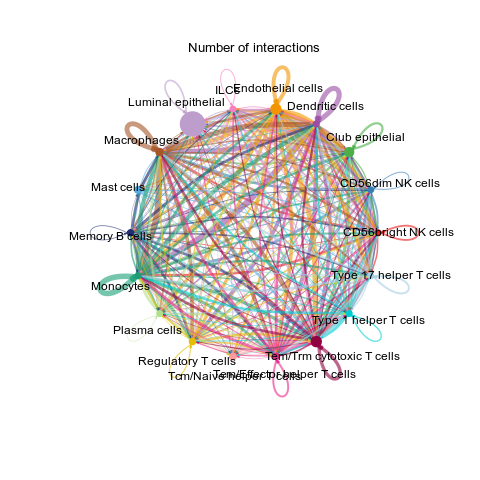

In [59]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#svglite(file ="number_of_interactions_all_glio.svg")
netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#netVisual_circle(cellchat@net$weight, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
#dev.off()

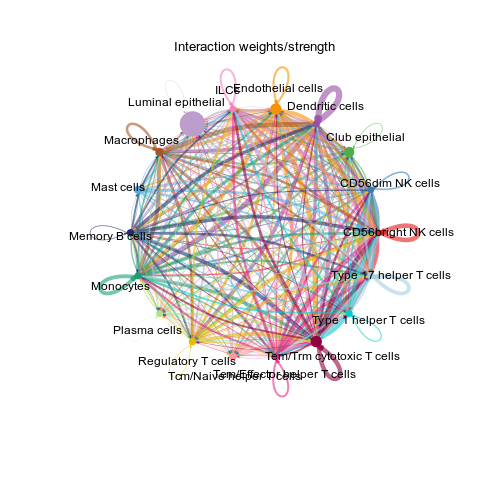

In [58]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#svglite(file ="interaction_weights_all_glio.svg")
#netVisual_circle(cellchat@net$count, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
netVisual_circle(cellchat@net$weight, vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
#dev.off()

In [ ]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#svglite(file ="number_of_interactions_cd56bright_cd56dim_as_targets_glio.svg")
netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#netVisual_circle(cellchat@net$weight, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#ggsave('number_of_interactions_cd56bright_cd56dim_as_targets.pdf')
#dev.off()

In [ ]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#svglite(file ="interaction_weights_cd56bright_cd56dim_as_targets_glio.svg")
netVisual_circle(cellchat@net$weight, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#dev.off()
#ggsave('interaction_weights_cd56bright_cd56dim_as_targets.pdf')

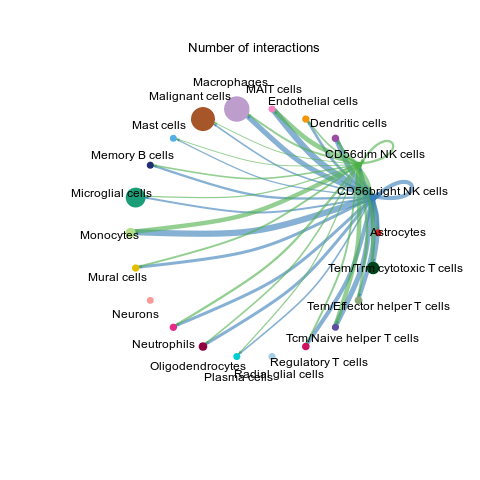

In [32]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#svglite(file ="number_of_interactions_cd56bright_cd56dim_as_sources_glio.svg")
netVisual_circle(cellchat@net$count, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#netVisual_circle(cellchat@net$weight, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#dev.off()
#ggsave('number_of_interactions_cd56bright_cd56dim_as_sources.pdf')

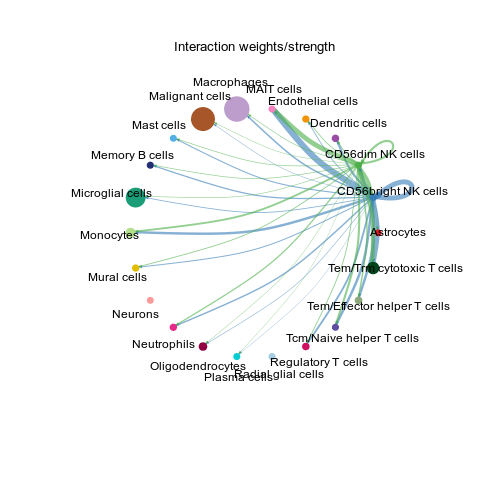

In [34]:
%%R
groupSize <- as.numeric(table(cellchat@idents))
par(mfrow = c(1,1), xpd=TRUE)
#netVisual_circle(cellchat@net$count, targets.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Number of interactions")
#svglite(file ="interaction_weights_cd56bright_cd56dim_as_sources_glio.svg")
netVisual_circle(cellchat@net$weight, sources.use=c(2,3), vertex.weight = groupSize, weight.scale = T, label.edge= F, title.name = "Interaction weights/strength")
#dev.off()
#ggsave('interaction_weights_cd56bright_cd56dim_as_sources.pdf')

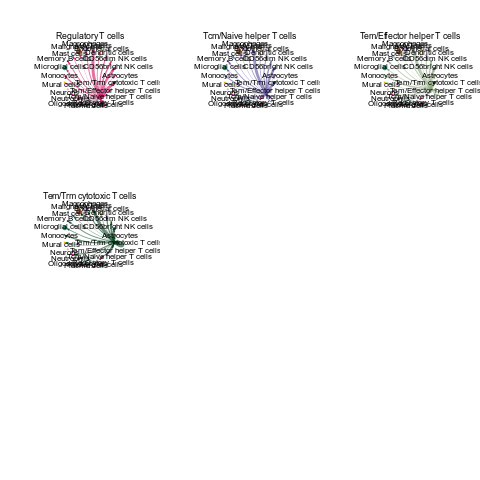

In [35]:
%%R
mat <- cellchat@net$weight
par(mfrow = c(3,3), xpd=TRUE)
for (i in 1:nrow(mat)) {
  mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
  mat2[i, ] <- mat[i, ]
  netVisual_circle(mat2, vertex.weight = groupSize, weight.scale = T, edge.weight.max = max(mat), title.name = rownames(mat)[i])
}

### CXCL

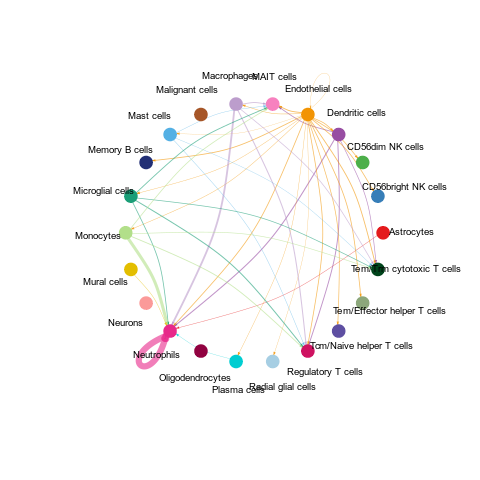

In [36]:
%%R
pathways.show <- c("CXCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="CXCL_pathway_netvisual_aggregate_circle_glio.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#dev.off()
#ggsave('CXCL_pathway_netvisual_aggregate_circle.pdf')

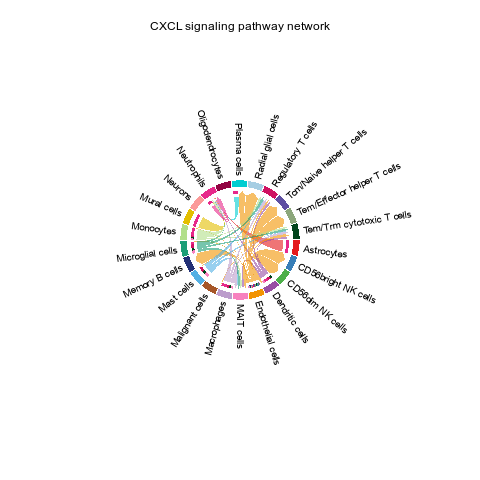

In [37]:
%%R
# Chord diagram
par(mfrow=c(1,1))
#svglite(file ="CXCL_pathway_netvisual_aggregate_chord_glio.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
#dev.off()

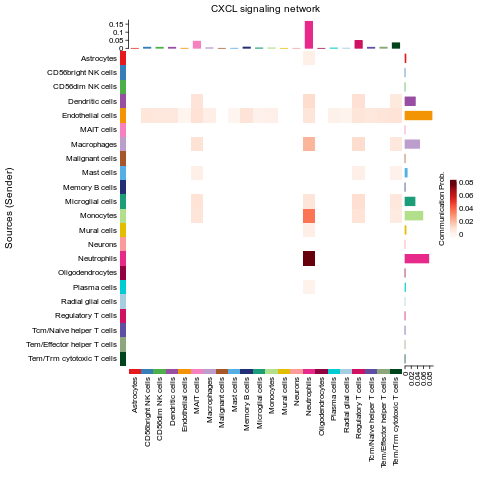

In [38]:
%%R
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
#> Do heatmap based on a single object
#ggsave('CXCL_pathway_netvisual_heatmap_glio.pdf')

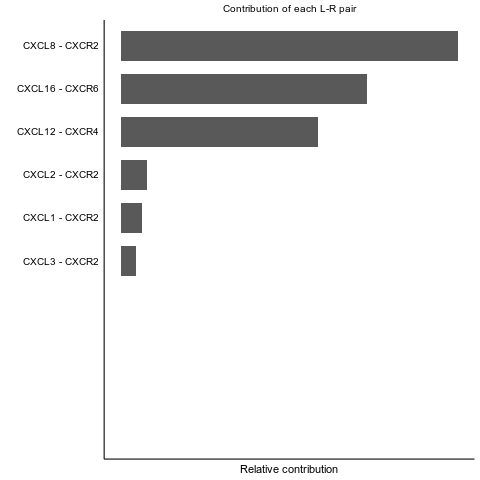

In [39]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)
#ggsave('CXCL_pathway_contribution_glio.pdf')

In [ ]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[4,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
svglite(file ="CXCL12_CXCR4_glio.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#ggsave('CXCL12_CXCR4.pdf')
dev.off()

In [ ]:
%%R
svglite(file ="CXCL12_CXCR4_chord_glio.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
dev.off()

In [ ]:
%%R
netVisual_bubble(cellchat, targets.use = c(2,3), signaling = c("CXCL"), remove.isolate = FALSE)
ggsave('cxcl12_cxcr4_nk_cells_bubble.pdf')

In [ ]:
%%R
plotGeneExpression(cellchat, signaling = "CXCL")
ggsave('CXCL_gene_expression.pdf')

In [ ]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="CXCL_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
#ggsave('CXCL_sig_pathway_role_network.pdf')
dev.off()

### CCL

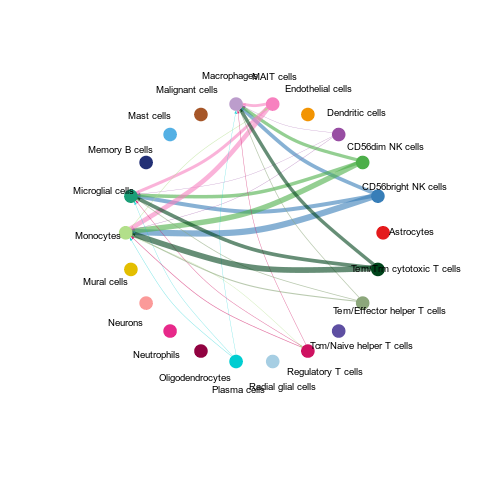

In [40]:
%%R
pathways.show <- c("CCL") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
par(mfrow=c(1,1))
#svglite(file ="CCL_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#dev.off()
#ggsave('CCL_pathway_netvisual_aggregate_circle.pdf')

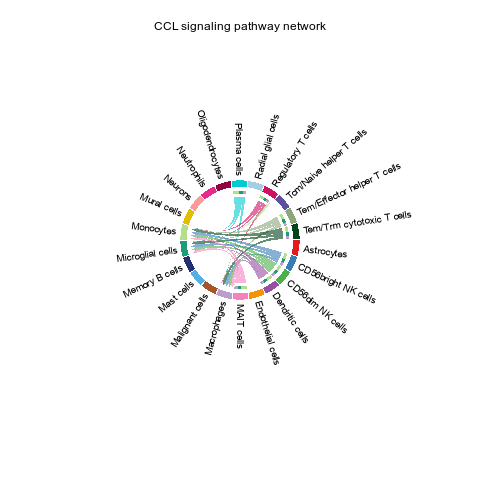

In [41]:
%%R
# Chord diagram
par(mfrow=c(1,1))
#svglite(file ="CCL_pathway_netvisual_aggregate_chord.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
#dev.off()
#ggsave('CCL_pathway_netvisual_aggregate_chord.pdf')

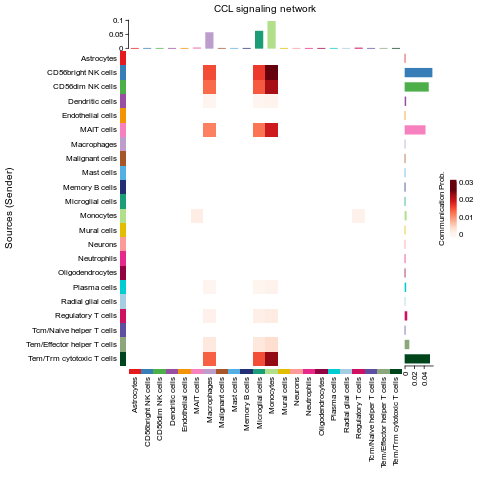

In [42]:
%%R
# Heatmap
par(mfrow=c(1,1))
#svglite(file ="CCL_pathway_netvisual_heatmap.svg")
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
#dev.off()

#> Do heatmap based on a single object
#ggsave('CCL_pathway_netvisual_heatmap.pdf')

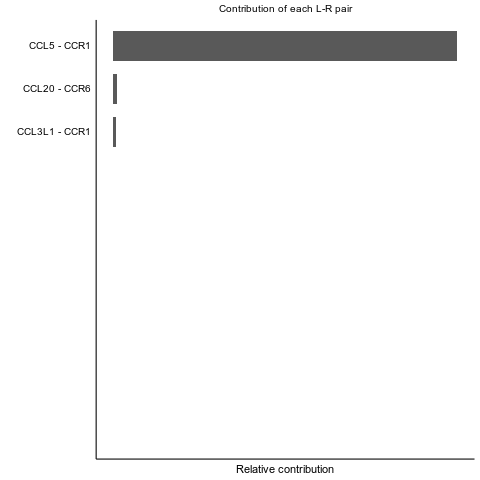

In [46]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)
#ggsave('CCL_pathway_contribution.pdf')

[[1]]



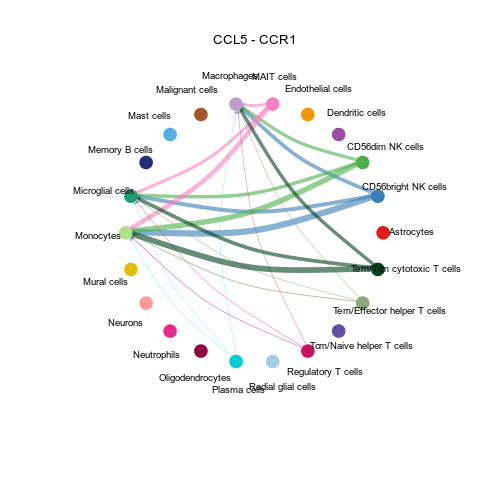

In [47]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[1,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
#svglite(file ="CCL5_CCR1.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#dev.off()

#ggsave('CCL5_CCR1.pdf')

[[1]]



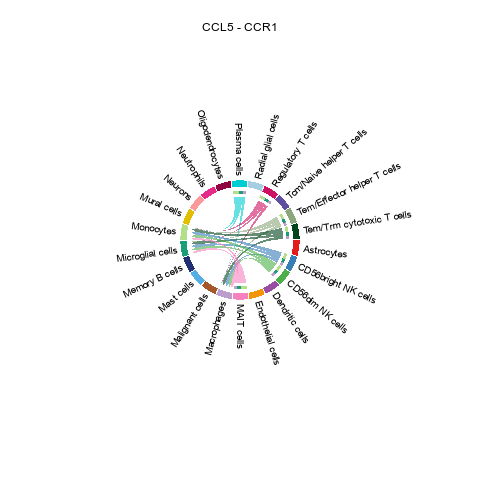

In [48]:
%%R
#svglite(file ="CCL5_CCR1_chord.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
#dev.off()

#ggsave('CCL5_CCR1_chord.pdf')

In [99]:
%%R
netVisual_bubble(cellchat, sources.use = c(2,3), signaling = c("CCL"), remove.isolate = FALSE)
ggsave('ccl_nk_cells_bubble.pdf')

Saving 6.67 x 6.67 in image


In [168]:
%%R
plotGeneExpression(cellchat, signaling = "CCL")
ggsave('CCL_gene_expression.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [169]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="CCL_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
dev.off()

#ggsave('CCL_sig_pathway_role_network.pdf')

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~01s           |+++                                               | 5 % ~03s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~02s           |++++++                                            | 11% ~03s           |+++++++                                           | 14% ~02s           |++++++++                                          | 16% ~02s           |++++++++++                                        | 18% ~02s           |+++++++++++                                       | 20% ~02s           |++++++++++++                                      | 23% ~02s           |+++++++++++++                                     | 25% ~02s           |++++++++++++++                                    | 27% ~01s           |+++++++++++++++                                   | 30% ~01s 

### MHC-I

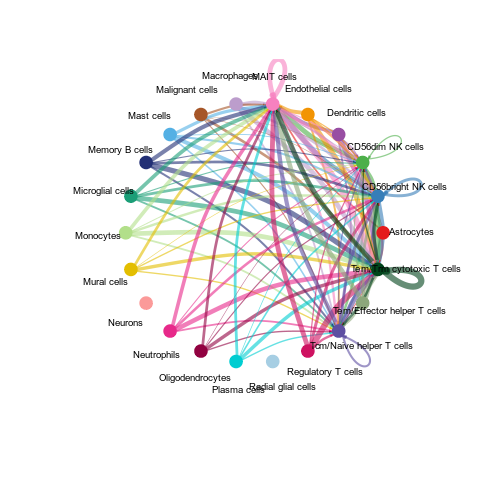

In [49]:
%%R
pathways.show <- c("MHC-I") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
#svglite(file ="a.pdf")
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="MHC_I_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#ggsave('MHC_I_pathway_netvisual_aggregate_circle.pdf')
#dev.off()

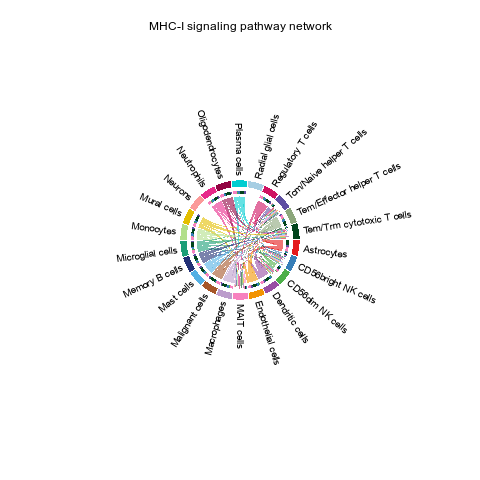

In [50]:
%%R
# Chord diagram
par(mfrow=c(1,1))
#svglite(file ="MHC_I_pathway_netvisual_aggregate_chord.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "chord")
#dev.off()
#ggsave('MHC_I_pathway_netvisual_aggregate_chord.pdf')

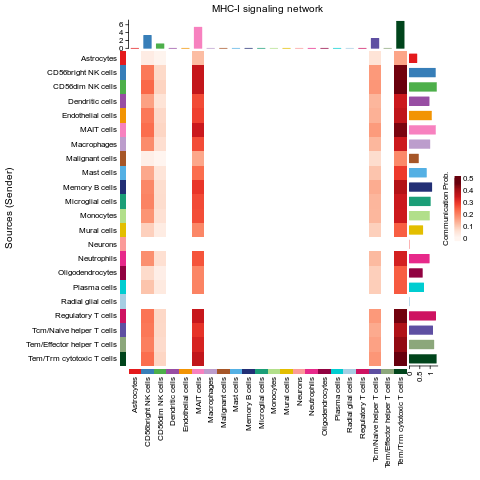

In [51]:
%%R
# Heatmap
par(mfrow=c(1,1))
netVisual_heatmap(cellchat, signaling = pathways.show, color.heatmap = "Reds")
#> Do heatmap based on a single object
#ggsave('MHC_I_pathway_netvisual_heatmap.pdf')

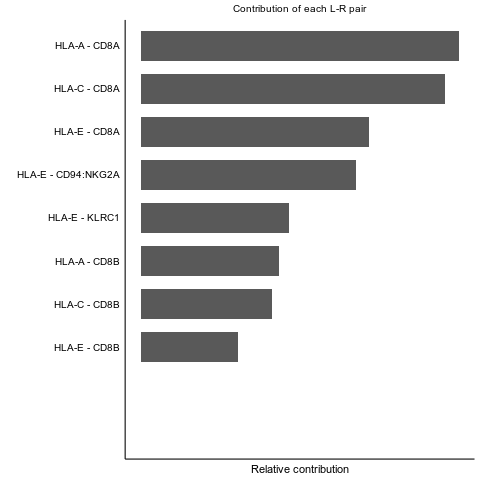

In [52]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)#, return.data=TRUE)
#ggsave('MHC_I_pathway_contribution.pdf')

In [213]:
%%R
mhc_cont$LR.contribution$name

 [1] HLA-E - CD94:NKG2A HLA-B - CD8A       HLA-A - CD8A       HLA-E - KLRC1     
 [5] HLA-C - CD8A       HLA-B - CD8B       HLA-A - CD8B       HLA-C - CD8B      
 [9] HLA-E - CD8A       HLA-E - CD8B       HLA-F - CD8A       HLA-F - CD8B      
12 Levels: HLA-E - CD94:NKG2A HLA-B - CD8A HLA-A - CD8A ... HLA-F - CD8B


In [53]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
pairLR.CXCL

  interaction_name
1       HLA-A_CD8A
2       HLA-C_CD8A
3       HLA-E_CD8A
4       HLA-A_CD8B
5       HLA-C_CD8B
6       HLA-E_CD8B
7      HLA-E_KLRC1
8 HLA-E_CD94:NKG2A


[[1]]



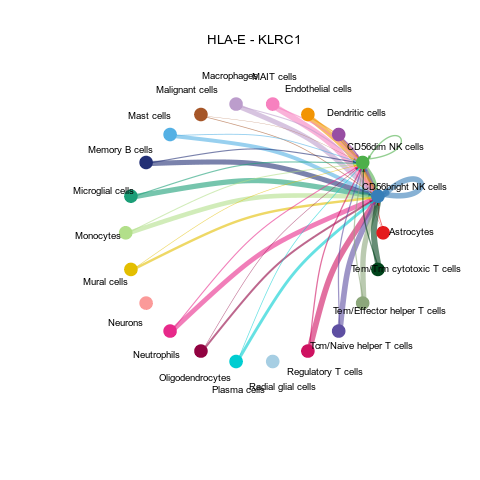

In [55]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[7,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
#svglite(file ="HLA_E_KLRC1.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#dev.off()
#ggsave('HLA_E_KLRC1.pdf')

[[1]]



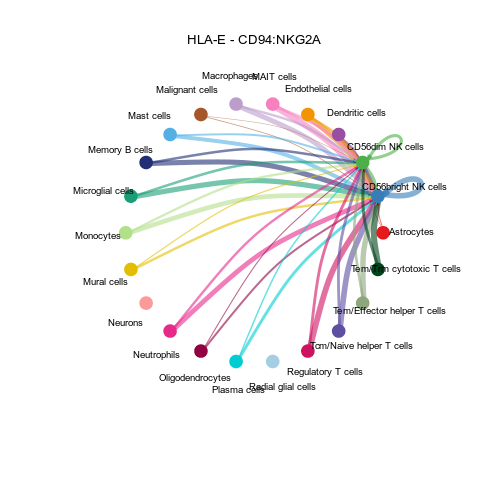

In [56]:
%%R
pairLR.CXCL <- extractEnrichedLR(cellchat, signaling = pathways.show, geneLR.return = FALSE)
LR.show <- pairLR.CXCL[8,] # show one ligand-receptor pair
# Hierarchy plot
vertex.receiver = seq(1,4) # a numeric vector
netVisual_individual(cellchat, signaling = pathways.show,  pairLR.use = LR.show, vertex.receiver = vertex.receiver)
#> [[1]]
# Circle plot
#svglite(file ="HLA_E_CD94.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "circle")
#dev.off()
#ggsave('HLA_E_CD94.pdf')

In [177]:
%%R
svglite(file ="HLA_E_CD94_chord.svg")
netVisual_individual(cellchat, signaling = pathways.show, pairLR.use = LR.show, layout = "chord")
dev.off()
#ggsave('HLA_E_CD94.pdf')

png 
  2 


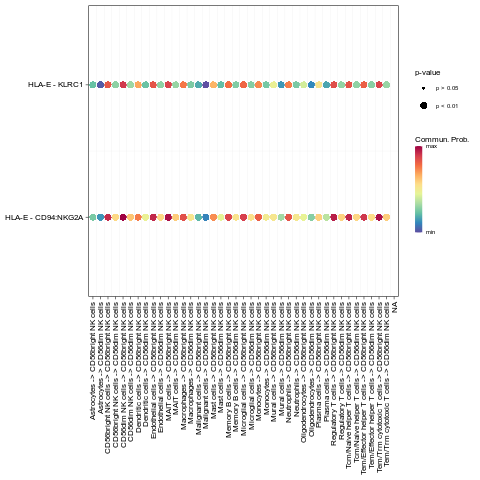

In [57]:
%%R
netVisual_bubble(cellchat, targets.use = c(2,3), signaling = c("MHC-I"), remove.isolate = FALSE)
#ggsave('MHC_I_nk_cells_bubble.pdf')

In [179]:
%%R
plotGeneExpression(cellchat, signaling = "MHC-I")
ggsave('MHC_I_gene_expression.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Saving 6.67 x 6.67 in image


In [180]:
%%R
# Compute the network centrality scores
cellchat <- netAnalysis_computeCentrality(cellchat, slot.name = "netP") # the slot 'netP' means the inferred intercellular communication network of signaling pathways
# Visualize the computed centrality scores using heatmap, allowing ready identification of major signaling roles of cell groups
svglite(file ="MHC_I_sig_pathway_role_network.svg")
netAnalysis_signalingRole_network(cellchat, signaling = pathways.show, width = 8, height = 2.5, font.size = 10)
dev.off()
#ggsave('MHC_I_sig_pathway_role_network.pdf')

  |                                                  | 0 % ~calculating   |++                                                | 2 % ~02s           |+++                                               | 5 % ~04s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~03s           |++++++                                            | 11% ~03s           |+++++++                                           | 14% ~03s           |++++++++                                          | 16% ~03s           |++++++++++                                        | 18% ~02s           |+++++++++++                                       | 20% ~02s           |++++++++++++                                      | 23% ~02s           |+++++++++++++                                     | 25% ~02s           |++++++++++++++                                    | 27% ~02s           |+++++++++++++++                                   | 30% ~02s 

### XCR

In [58]:
%%R
cellchat

An object of class CellChat created from a single dataset 
 26355 genes.
 782101 cells. 
CellChat analysis of single cell RNA-seq data! 


In [59]:
%%R
pathways.show.all <- cellchat@netP$pathways

In [60]:
%%R
pathways.show.all

 [1] "MIF"        "MHC-I"      "SPP1"       "COLLAGEN"   "PTN"       
 [6] "CLEC"       "APP"        "MHC-II"     "FN1"        "GALECTIN"  
[11] "LAMININ"    "ANNEXIN"    "MK"         "PSAP"       "ITGB2"     
[16] "VISFATIN"   "COMPLEMENT" "ADGRE5"     "GRN"        "CD45"      
[21] "ICAM"       "NCAM"       "CXCL"       "IL1"        "EGF"       
[26] "LCK"        "CD22"       "VEGF"       "THY1"       "JAM"       
[31] "SELPLG"     "CCL"        "SELL"       "THBS"       "PARs"      
[36] "PECAM1"     "CLDN"       "CADM"       "MAG"        "FGF"       
[41] "TGFb"       "CD86"       "IL16"       "CD39"       "ESAM"      
[46] "GAS"        "CNTN"       "RESISTIN"   "ALCAM"      "CD6"       
[51] "CDH"        "ANGPTL"     "ANXA1"      "ANGPT"      "NECTIN"    
[56] "BAFF"       "NOTCH"      "EDN"        "CD46"       "SEMA4"     
[61] "OSM"        "SEMA3"      "CSF"        "TIGIT"      "PDGF"      
[66] "VISTA"      "CALCR"      "CD40"       "CD96"       "MPZ"       
[71] "CDH5"       "T

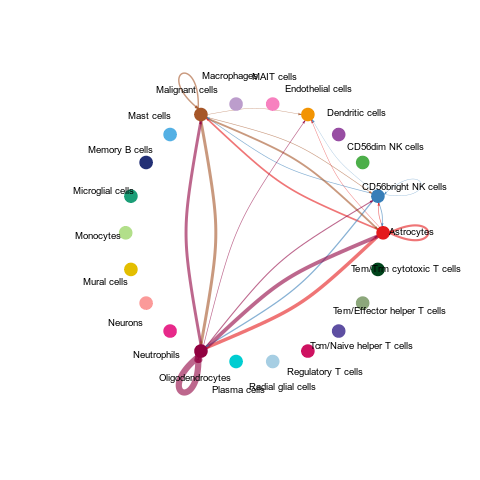

In [65]:
%%R
pathways.show <- c("NCAM") 
# Hierarchy plot
# Here we define `vertex.receive` so that the left portion of the hierarchy plot shows signaling to fibroblast and the right portion shows signaling to immune cells 
vertex.receiver = seq(1,4) # a numeric vector. 
#svglite(file ="a.pdf")
netVisual_aggregate(cellchat, signaling = pathways.show,  vertex.receiver = vertex.receiver)
# Circle plot
#par(mfrow=c(1,1))
#svglite(file ="MHC_I_pathway_netvisual_aggregate_circle.svg")
netVisual_aggregate(cellchat, signaling = pathways.show, layout = "circle")
#ggsave('MHC_I_pathway_netvisual_aggregate_circle.pdf')
#dev.off()

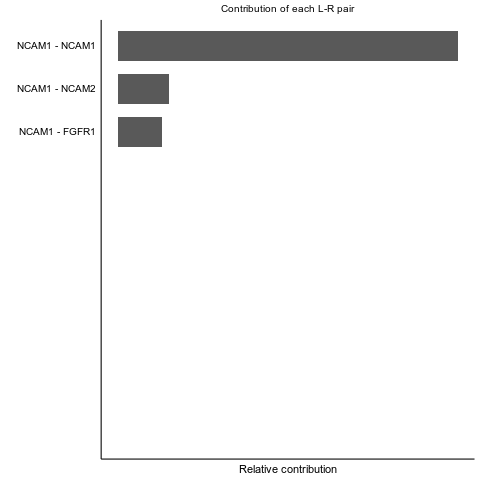

In [66]:
%%R
netAnalysis_contribution(cellchat, signaling = pathways.show)#, return.data=TRUE)
#ggsave('MHC_I_pathway_contribution.pdf')

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


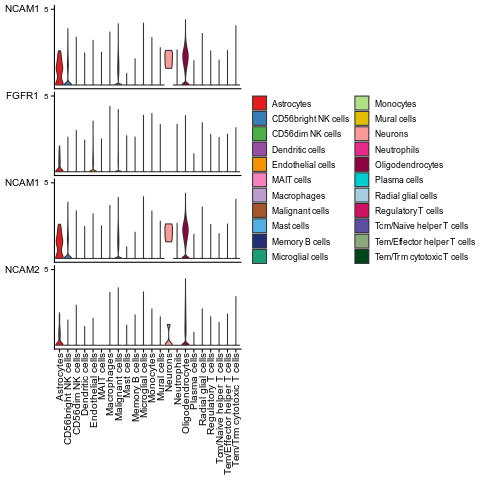

In [67]:
%%R
plotGeneExpression(cellchat, signaling = pathways.show)
#ggsave('MHC_I_gene_expression.pdf')